# Part1

FE 621 Assignment 2
Author: Muhammet Furkan Isik
Date: 03/14/2021

### Importing and Organising Data

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from datetime import datetime
import math
import matplotlib.pyplot as plt

In [2]:
# Importing option chain from yahoo finance, and organizing the dataframe  

def get_optionchain(inpt,exprdt):
    
# expiration date format should be like this "2020-03-12"
    
       
    stock=yf.Ticker(inpt)
    
    opt=stock.option_chain(exprdt)
    
    call=opt.calls
    
    put=opt.puts
    
    option_chain=call.append(put)
    
    
    
    
    a=option_chain.drop(["lastTradeDate","change","percentChange","volume","openInterest","inTheMoney","contractSize","currency"],axis=1)
    
    a["Expiration Date"]=exprdt
    
    
    a.columns=['Option Name', 'Strike',"Last Price","Bid","Ask","Implied Volatility","Expiration Date"]
    
    a.reset_index(drop=True,inplace=True)
    
    
    
    # Loop to assign P or C values depending on the type of the option
    for i,j in a.iterrows():
        
        if j["Option Name"][-9]=="P":
                
       
            a.loc[i,"Type"]="put"
        
        
        
        
        elif j["Option Name"][-9]=="C":
                
        
            a.loc[i,"Type"]="call"
        
              
    
    
    a = a[['Option Name',"Expiration Date","Type",'Strike',"Bid","Ask","Last Price","Implied Volatility"]]
    
    a.sort_values(by=['Strike'], inplace=True, ascending=True)

    
    
    return a


In [3]:
# example for the function above


a1=get_optionchain("AMZN",exprdt="2021-03-19")
a2=get_optionchain("AMZN",exprdt="2021-04-16")
a3=get_optionchain("AMZN",exprdt="2021-05-21")


AMZN_opt1=a1.append(a2).append(a3)

AMZN_opt1=AMZN_opt1.reset_index(drop=True)

AMZN_opt1


,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,AMZN210319C01460000,2021-03-19,call,1460.0,1624.20,1636.55,1676.15,2.247075
1,AMZN210319P01460000,2021-03-19,put,1460.0,0.01,0.02,0.02,1.609377
2,AMZN210319P01480000,2021-03-19,put,1480.0,0.00,0.05,0.07,1.632814
3,AMZN210319C01480000,2021-03-19,call,1480.0,1604.15,1616.55,1604.39,2.202153
4,AMZN210319P01500000,2021-03-19,put,1500.0,0.00,0.05,0.01,1.609377
...,...,...,...,...,...,...,...,...
997,AMZN210521C04700000,2021-05-21,call,4700.0,2.60,3.15,2.74,0.431707
998,AMZN210521C04800000,2021-05-21,call,4800.0,2.08,2.60,2.60,0.438635
999,AMZN210521C04900000,2021-05-21,call,4900.0,1.82,2.68,2.23,0.457678
1000,AMZN210521C05000000,2021-05-21,call,5000.0,1.90,2.19,2.00,0.462774


Subsetting only call options

In [4]:
# Subsetting only call options

AMZN_calls=AMZN_opt1.loc[AMZN_opt1["Type"]=="call"].reset_index(drop=True)
AMZN_calls

,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,AMZN210319C01460000,2021-03-19,call,1460.0,1624.20,1636.55,1676.15,2.247075
1,AMZN210319C01480000,2021-03-19,call,1480.0,1604.15,1616.55,1604.39,2.202153
2,AMZN210319C01500000,2021-03-19,call,1500.0,1588.00,1593.30,1617.10,2.237309
3,AMZN210319C01520000,2021-03-19,call,1520.0,1564.35,1576.70,1597.30,2.171391
4,AMZN210319C01540000,2021-03-19,call,1540.0,1770.70,1778.10,1682.65,6.910249
...,...,...,...,...,...,...,...,...
484,AMZN210521C04600000,2021-05-21,call,4600.0,2.97,3.55,3.05,0.419958
485,AMZN210521C04700000,2021-05-21,call,4700.0,2.60,3.15,2.74,0.431707
486,AMZN210521C04800000,2021-05-21,call,4800.0,2.08,2.60,2.60,0.438635
487,AMZN210521C04900000,2021-05-21,call,4900.0,1.82,2.68,2.23,0.457678


Subsettin AMZN at the money calls for 3 different expiration date

In [5]:
# AMZN at the money calls for 3 different expiration date
AMZN_ATM_calls=AMZN_calls[(AMZN_calls["Strike"]>3000) & (AMZN_calls["Strike"]<3180)].reset_index(drop=True)
#AMZN_ATM_calls

AMZN_ATM_calls=AMZN_ATM_calls.sort_values("Strike",ascending=True).reset_index(drop=True)
AMZN_ATM_calls

,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,AMZN210319C03010000,2021-03-19,call,3010.0,100.20,104.05,102.52,0.355689
1,AMZN210521C03010000,2021-05-21,call,3010.0,223.35,226.80,208.45,0.348758
2,AMZN210416C03010000,2021-04-16,call,3010.0,157.70,161.05,162.55,0.315269
3,AMZN210416C03020000,2021-04-16,call,3020.0,151.30,154.85,153.35,0.314201
4,AMZN210521C03020000,2021-05-21,call,3020.0,217.50,220.80,215.50,0.347491
...,...,...,...,...,...,...,...,...
62,AMZN210319C03165000,2021-03-19,call,3165.0,18.45,19.55,19.60,0.301246
63,AMZN210416C03170000,2021-04-16,call,3170.0,73.95,76.20,75.65,0.293662
64,AMZN210319C03170000,2021-03-19,call,3170.0,17.20,18.55,17.70,0.303321
65,AMZN210521C03170000,2021-05-21,call,3170.0,141.20,143.70,138.20,0.333892


### Blackscholes

In [6]:
## Blackscholes function to calulate option price

# S= Stock Price

# K= Strike Price

# t= Expiration Date

# sig= Volatility

# optype= Type

# r= risk free interest rate



def blackscholes(S,K,t,optype,sig,r=0.0008):
    
    d1= (np.log(S/K)+(r+sig**2/2)*t)/(sig*np.sqrt(t))
    
    d2= d1-sig*np.sqrt(t)
        
    call_price=norm.cdf(d1,0,1)*S-  norm.cdf(d2,0,1)*K*np.exp(-r*t)
           
    put_price = K* np.exp(-r*t)* norm.cdf(-d2,0,1) -  S* norm.cdf(-d1,0,1)
    
    if optype== "call":
        
        return call_price
    
    elif optype=="put":
        
        return put_price


### Bisection

In [8]:
# bisection function compatible with apply function

def bisection(row):
    
    S=3049
    K=row["Strike"]
    optype=row["Type"]
    
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days   
    avr_price=(row["Bid"]+row["Ask"])/2
    
    
    
    a= 0.01
    b=1
    
         
    f_b=blackscholes(S,K,t,optype,b)-avr_price
        
    f_a=blackscholes(S,K,t,optype,a)-avr_price
    
    count=0
    
    
    
    while b-a>0.01:
            
            
            count+=1
            
            if count>1000:
                
                break
            
            
                      
            
            
            c=a+b/2
            
            f_c=blackscholes(S,K,t,optype,c)-avr_price
            
            f_b=f_b
            f_a=f_a
            
            
            #f_b=blackscholes(S,K,t,optype,b)-avr_price
        
            #f_a=blackscholes(S,K,t,optype,a)-avr_price
        
            
            
            if f_c<0.01:
                
                                
                break
            
            
            if f_c*f_b<0:
                
                a=c
                
                            
            elif f_c*f_a<0:
                                
                b=c
                                
    return c

Applyin bisection method on ATM calls to find implied volatilities

In [9]:
# example using bisection with apply function on ATM calls

AMZN_vol=AMZN_ATM_calls.apply(lambda row: bisection(row),axis=1)
AMZN_ATM_calls["bisection_implied"]=AMZN_vol
AMZN_ATM_calls


,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility,bisection_implied
0,AMZN210319C03010000,2021-03-19,call,3010.0,100.20,104.05,102.52,0.355689,0.027656
1,AMZN210521C03010000,2021-05-21,call,3010.0,223.35,226.80,208.45,0.348758,0.020000
2,AMZN210416C03010000,2021-04-16,call,3010.0,157.70,161.05,162.55,0.315269,0.020000
3,AMZN210416C03020000,2021-04-16,call,3020.0,151.30,154.85,153.35,0.314201,0.020000
4,AMZN210521C03020000,2021-05-21,call,3020.0,217.50,220.80,215.50,0.347491,0.020000
...,...,...,...,...,...,...,...,...,...
62,AMZN210319C03165000,2021-03-19,call,3165.0,18.45,19.55,19.60,0.301246,0.021914
63,AMZN210416C03170000,2021-04-16,call,3170.0,73.95,76.20,75.65,0.293662,0.020000
64,AMZN210319C03170000,2021-03-19,call,3170.0,17.20,18.55,17.70,0.303321,0.021914
65,AMZN210521C03170000,2021-05-21,call,3170.0,141.20,143.70,138.20,0.333892,0.020000


## Binomial General Additive European Call

In [10]:
# Binomial General Additive European Call

def AdditiveEC(row):
    
    S=3000
    K= row["Strike"]
    r=0.0008
    N=200
    
    sig=row["Implied Volatility"]
    
    today = datetime.today()
    
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    T=(exp-today).days
    
    
    
    
    
    dt=T/(N-1)                                      # Dividing time into N periods
    
    nu=r- 0.5*(sig**2)                             # risk neutral drift
    
    dxu=np.sqrt((sig**2)*dt + (nu*dt)**2)         # Small increment in x
    
    dxd= -dxu
    
    pu= 0.5+ 0.5*((nu*dt)/dxu)                   # Prob up
    
    pd=1-pu                                     # Prob down
    
    disc=np.exp(-r*dt)                          # continuous discount
    
    
    
    #St=S* np.exp(N*dxd)
    
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N,N))
    
    call_prices=np.zeros((N,N))
    
    
    
    #stock_prices[0,0]=S
    
    for j in range(0,N):
        
        M=j+1
        
        
        stock_prices[j,0]= S* math.exp(j*dxd)
        
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(j*dxd)
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(dxu-dxd)
        
        for i in range(1,M):
            
            stock_prices[j,i]=stock_prices[j,i-1]*np.exp(dxu-dxd)
            
            
        
        
    
    
    call_prices[0,0]=0
    
    
    for j in range(1,N):
        
        M=j+1
        
        
        call_prices[j,0]=max(0,stock_prices[j,0]-K)
        
        
        for i in range(1,M):
            
            
            call_prices[j,i]=max(0,stock_prices[j,i]-K)
        
        
         
    #return call_prices

    
    #return dxd
    #return stock_prices
    
    #return call_prices
    
    
    rcall_prices=np.zeros((N,N))
    
    for j in range(N-1,-1,-1):
        
        if j==N-1:
            
            for i in range(0,N):
                
                rcall_prices[j,i]=call_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j+1):
                
                rcall_prices[j,i]=  disc* (pd*rcall_prices[j+1,i]  +  pu*rcall_prices[j+1,i+1])
                
                #print(rcall_prices[j,i])
    
    
    return rcall_prices[0,0]
                


In [11]:
Tree_Price=AMZN_ATM_calls.apply(lambda row: AdditiveEC(row),axis=1 )
Tree_Price

0      835.042526
1     2633.717863
2     1908.901671
3     1902.062730
4     2627.369024
         ...     
62     653.792285
63    1773.665601
64     656.979409
65    2553.401826
66     657.326756
Length: 67, dtype: float64

Applying Binomial General Additive European Method 

In [12]:
AMZN_ATM_calls["Tree_Price"]=Tree_Price
AMZN_ATM_calls

,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility,bisection_implied,Tree_Price
0,AMZN210319C03010000,2021-03-19,call,3010.0,100.20,104.05,102.52,0.355689,0.027656,835.042526
1,AMZN210521C03010000,2021-05-21,call,3010.0,223.35,226.80,208.45,0.348758,0.020000,2633.717863
2,AMZN210416C03010000,2021-04-16,call,3010.0,157.70,161.05,162.55,0.315269,0.020000,1908.901671
3,AMZN210416C03020000,2021-04-16,call,3020.0,151.30,154.85,153.35,0.314201,0.020000,1902.062730
4,AMZN210521C03020000,2021-05-21,call,3020.0,217.50,220.80,215.50,0.347491,0.020000,2627.369024
...,...,...,...,...,...,...,...,...,...,...
62,AMZN210319C03165000,2021-03-19,call,3165.0,18.45,19.55,19.60,0.301246,0.021914,653.792285
63,AMZN210416C03170000,2021-04-16,call,3170.0,73.95,76.20,75.65,0.293662,0.020000,1773.665601
64,AMZN210319C03170000,2021-03-19,call,3170.0,17.20,18.55,17.70,0.303321,0.021914,656.979409
65,AMZN210521C03170000,2021-05-21,call,3170.0,141.20,143.70,138.20,0.333892,0.020000,2553.401826


## Binomial General Additive European Put

In [13]:
# Binomial General Additive European Put

def AdditiveEP(row):
    
    S=3000
    K= row["Strike"]
    r=0.0008
    N=200
    
    sig=row["Implied Volatility"]
    
    today = datetime.today()
    
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    T=(exp-today).days
    
    
    
    
    
    dt=T/(N-1)                                      # Dividing time into N periods
    
    nu=r- 0.5*(sig**2)                             # risk neutral drift
    
    dxu=np.sqrt((sig**2)*dt + (nu*dt)**2)         # Small increment in x
    
    dxd= -dxu
    
    pu= 0.5+ 0.5*((nu*dt)/dxu)                   # Prob up
    
    pd=1-pu                                     # Prob down
    
    disc=np.exp(-r*dt)                          # continuous discount
    
    
    
    #St=S* np.exp(N*dxd)
    
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N,N))
    
    put_prices=np.zeros((N,N))
    
    
    
    #stock_prices[0,0]=S
    
    for j in range(0,N):
        
        M=j+1
        
        
        stock_prices[j,0]= S* math.exp(j*dxd)
        
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(j*dxd)
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(dxu-dxd)
        
        for i in range(1,M):
            
            stock_prices[j,i]=stock_prices[j,i-1]*np.exp(dxu-dxd)
            
            
        
        
    
    
    put_prices[0,0]=0
    
    
    for j in range(1,N):
        
        M=j+1
        
        
        put_prices[j,0]=max(0,K-stock_prices[j,0])
        
        
        for i in range(1,M):
            
            
            put_prices[j,i]=max(0,stock_prices[j,i]-K)
        
        
         
    #return call_prices

    
    #return dxd
    #return stock_prices
    
    #return call_prices
    
    
    rput_prices=np.zeros((N,N))
    
    for j in range(N-1,-1,-1):
        
        if j==N-1:
            
            for i in range(0,N):
                
                rput_prices[j,i]=put_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j+1):
                
                rput_prices[j,i]=  disc* (pd*rput_prices[j+1,i]  +  pu*rput_prices[j+1,i+1])
                
                #print(rcall_prices[j,i])
    
    
    return rput_prices[0,0]
                


## Binomial General Additive American Put

In [14]:
# Binomial General Additive American Put

def AdditiveAP(row):
    
    S=3000
    K= row["Strike"]
    r=0.0008
    N=200
    
    sig=row["Implied Volatility"]
    
    today = datetime.today()
    
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    T=(exp-today).days
    
    
    
    
    dt=T/(N-1)                                      # Dividing time into N periods
    
    nu=r- 0.5*(sig**2)                             # risk neutral drift
    
    dxu=np.sqrt((sig**2)*dt + (nu*dt)**2)         # Small increment in x
    
    dxd= -dxu
    
    pu= 0.5+ 0.5*((nu*dt)/dxu)                   # Prob up
    
    pd=1-pu                                     # Prob down
    
    disc=np.exp(-r*dt)                          # continuous discount
    
    
    
    #St=S* np.exp(N*dxd)
    
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N,N))
    
    put_prices=np.zeros((N,N))
    
    
    
    #stock_prices[0,0]=S
    
    for j in range(0,N):
        
        M=j+1
        
        
        stock_prices[j,0]= S* np.exp(j*dxd)
        
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(j*dxd)
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(dxu-dxd)
        
        for i in range(1,M):
            
            stock_prices[j,i]=stock_prices[j,i-1]*np.exp(dxu-dxd)
            
            
        
        
    
    
    put_prices[0,0]=0
    
    
    for j in range(1,N):
        
        M=j+1
        
        
        put_prices[j,0]=max(0,K-stock_prices[j,0])
        
        
        for i in range(1,M):
            
            
            put_prices[j,i]=max(0,K-stock_prices[j,i])
        
        
         
    #return call_prices

    
    #return dxd
    #return stock_prices
    
    #return call_prices
    
    
    C_stock_prices=np.zeros((N,N))
    rput_prices=np.zeros((N,N))
       

    
    
    
    for j in range(N-1,-1,-1):
        
        if j==N-1:
            
            for i in range(0,N):
                
                rput_prices[j,i]=put_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j+1):
                
                rput_prices[j,i]=  disc* (pd*rput_prices[j+1,i]  +  pu*rput_prices[j+1,i+1])
                
                C_stock_prices[j,i]=stock_prices[j,i]/ (np.exp(dxd))
                
                
                rput_prices[j,i]= max(rput_prices[j,i], K- C_stock_prices[j,i])
                
                #print(rcall_prices[j,i])
    
    
    #return rput_prices

    #return stock_prices

    return rput_prices[0,0]
    
    #return dxd

    #return dt
                

In [15]:
# Subsetting only put options

AMZN_puts=AMZN_opt1.loc[AMZN_opt1["Type"]=="put"].reset_index(drop=True)
AMZN_puts


,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,AMZN210319P01460000,2021-03-19,put,1460.0,0.01,0.02,0.02,1.609377
1,AMZN210319P01480000,2021-03-19,put,1480.0,0.00,0.05,0.07,1.632814
2,AMZN210319P01500000,2021-03-19,put,1500.0,0.00,0.05,0.01,1.609377
3,AMZN210319P01520000,2021-03-19,put,1520.0,0.00,0.05,0.05,1.578127
4,AMZN210319P01540000,2021-03-19,put,1540.0,0.00,0.05,0.01,1.546877
...,...,...,...,...,...,...,...,...
508,AMZN210521P04400000,2021-05-21,put,4400.0,1303.20,1318.15,1338.05,0.429571
509,AMZN210521P04500000,2021-05-21,put,4500.0,1402.80,1417.90,1447.10,0.448904
510,AMZN210521P04600000,2021-05-21,put,4600.0,1502.55,1517.50,1507.70,0.465765
511,AMZN210521P04700000,2021-05-21,put,4700.0,1601.60,1620.00,1575.75,0.510793


In [16]:
# AMZN at the money putss for 3 different expiration date
AMZN_ATM_puts=AMZN_puts[(AMZN_puts["Strike"]>2800) & (AMZN_puts["Strike"]<3090)].reset_index(drop=True)


AMZN_ATM_puts=AMZN_ATM_puts.sort_values("Strike",ascending=True).reset_index(drop=True)
AMZN_ATM_puts

,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility
0,AMZN210319P02850000,2021-03-19,put,2850.0,5.05,6.00,5.40,0.444738
1,AMZN210319P02900000,2021-03-19,put,2900.0,7.15,7.95,7.75,0.398962
2,AMZN210521P02900000,2021-05-21,put,2900.0,100.30,102.75,104.22,0.350901
3,AMZN210416P02900000,2021-04-16,put,2900.0,45.65,47.65,46.62,0.327155
4,AMZN210319P02910000,2021-03-19,put,2910.0,7.75,9.00,8.72,0.397101
...,...,...,...,...,...,...,...,...
62,AMZN210319P03075000,2021-03-19,put,3075.0,40.55,43.00,42.14,0.316619
63,AMZN210319P03080000,2021-03-19,put,3080.0,42.65,45.35,43.70,0.316627
64,AMZN210416P03080000,2021-04-16,put,3080.0,104.10,106.90,103.20,0.297218
65,AMZN210521P03080000,2021-05-21,put,3080.0,170.65,173.60,170.81,0.333587


In [17]:
Tree_AmPut_Price=AMZN_ATM_puts.apply(lambda row: AdditiveAP(row),axis=1 )
Tree_AmPut_Price

0      925.120066
1      860.025237
2     2345.309553
3     1797.890826
4      862.488544
         ...     
62     786.939674
63     790.059576
64    1803.833721
65    2439.611441
66     788.333960
Length: 67, dtype: float64

Applying  Binomial General Additive American Put on AMZN OptionChain

In [18]:
AMZN_ATM_puts["Tree_Price"]=Tree_AmPut_Price
AMZN_ATM_puts

,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility,Tree_Price
0,AMZN210319P02850000,2021-03-19,put,2850.0,5.05,6.00,5.40,0.444738,925.120066
1,AMZN210319P02900000,2021-03-19,put,2900.0,7.15,7.95,7.75,0.398962,860.025237
2,AMZN210521P02900000,2021-05-21,put,2900.0,100.30,102.75,104.22,0.350901,2345.309553
3,AMZN210416P02900000,2021-04-16,put,2900.0,45.65,47.65,46.62,0.327155,1797.890826
4,AMZN210319P02910000,2021-03-19,put,2910.0,7.75,9.00,8.72,0.397101,862.488544
...,...,...,...,...,...,...,...,...,...
62,AMZN210319P03075000,2021-03-19,put,3075.0,40.55,43.00,42.14,0.316619,786.939674
63,AMZN210319P03080000,2021-03-19,put,3080.0,42.65,45.35,43.70,0.316627,790.059576
64,AMZN210416P03080000,2021-04-16,put,3080.0,104.10,106.90,103.20,0.297218,1803.833721
65,AMZN210521P03080000,2021-05-21,put,3080.0,170.65,173.60,170.81,0.333587,2439.611441


### Blackscholes on dataframe

In [19]:
## Blackscholes function to calulate option price

# S= Stock Price

# K= Strike Price

# t= Expiration Date

# sig= Volatility

# optype= Type

# r= risk free interest rate



def blackscholes(row):
    
    S=3000
    
    K=row["Strike"]
    
    today = datetime.today()
    exp=datetime.strptime(row["Expiration Date"],"%Y-%m-%d")
    t=(exp-today).days   
    
    optype=row["Type"]
    
    sig=row["Implied Volatility"]
    
    r=0.0008
    
    
    
    
    
    d1= (np.log(S/K)+(r+sig**2/2)*t)/(sig*np.sqrt(t))
    
    d2= d1-sig*np.sqrt(t)
        
    call_price=norm.cdf(d1,0,1)*S-  norm.cdf(d2,0,1)*K*np.exp(-r*t)
           
    put_price = K* np.exp(-r*t)* norm.cdf(-d2,0,1) -  S* norm.cdf(-d1,0,1)
    
    if optype== "call":
        
        return call_price
    
    elif optype=="put":
        
        return put_price


Applying Blackscholes on AMZN calls

In [20]:
Blackscholes_callprice=AMZN_ATM_calls.apply(lambda row: blackscholes(row),axis=1)

In [21]:
AMZN_ATM_calls["Black_Price"]=Blackscholes_callprice
AMZN_ATM_calls

,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility,bisection_implied,Tree_Price,Black_Price
0,AMZN210319C03010000,2021-03-19,call,3010.0,100.20,104.05,102.52,0.355689,0.027656,835.042526,833.640729
1,AMZN210521C03010000,2021-05-21,call,3010.0,223.35,226.80,208.45,0.348758,0.020000,2633.717863,2551.038551
2,AMZN210416C03010000,2021-04-16,call,3010.0,157.70,161.05,162.55,0.315269,0.020000,1908.901671,1894.781235
3,AMZN210416C03020000,2021-04-16,call,3020.0,151.30,154.85,153.35,0.314201,0.020000,1902.062730,1888.115773
4,AMZN210521C03020000,2021-05-21,call,3020.0,217.50,220.80,215.50,0.347491,0.020000,2627.369024,2545.896188
...,...,...,...,...,...,...,...,...,...,...,...
62,AMZN210319C03165000,2021-03-19,call,3165.0,18.45,19.55,19.60,0.301246,0.021914,653.792285,653.677230
63,AMZN210416C03170000,2021-04-16,call,3170.0,73.95,76.20,75.65,0.293662,0.020000,1773.665601,1763.377456
64,AMZN210319C03170000,2021-03-19,call,3170.0,17.20,18.55,17.70,0.303321,0.021914,656.979409,656.786568
65,AMZN210521C03170000,2021-05-21,call,3170.0,141.20,143.70,138.20,0.333892,0.020000,2553.401826,2484.272823


In [ ]:
Applying Blackscholes on AMZN puts

In [22]:
Blackscholes_putprice=AMZN_ATM_puts.apply(lambda row: blackscholes(row),axis=1)

In [24]:
AMZN_ATM_puts["Black_Price"]=Blackscholes_putprice
AMZN_ATM_puts

,Option Name,Expiration Date,Type,Strike,Bid,Ask,Last Price,Implied Volatility,Tree_Price,Black_Price
0,AMZN210319P02850000,2021-03-19,put,2850.0,5.05,6.00,5.40,0.444738,925.120066,925.355405
1,AMZN210319P02900000,2021-03-19,put,2900.0,7.15,7.95,7.75,0.398962,860.025237,859.599771
2,AMZN210521P02900000,2021-05-21,put,2900.0,100.30,102.75,104.22,0.350901,2345.309553,2315.269862
3,AMZN210416P02900000,2021-04-16,put,2900.0,45.65,47.65,46.62,0.327155,1797.890826,1793.793020
4,AMZN210319P02910000,2021-03-19,put,2910.0,7.75,9.00,8.72,0.397101,862.488544,861.920767
...,...,...,...,...,...,...,...,...,...,...
62,AMZN210319P03075000,2021-03-19,put,3075.0,40.55,43.00,42.14,0.316619,786.939674,786.506546
63,AMZN210319P03080000,2021-03-19,put,3080.0,42.65,45.35,43.70,0.316627,790.059576,789.701531
64,AMZN210416P03080000,2021-04-16,put,3080.0,104.10,106.90,103.20,0.297218,1803.833721,1800.104155
65,AMZN210521P03080000,2021-05-21,put,3080.0,170.65,173.60,170.81,0.333587,2439.611441,2409.760554


## Plots

AMZN Calls' plot

Text(0, 0.5, 'Price')

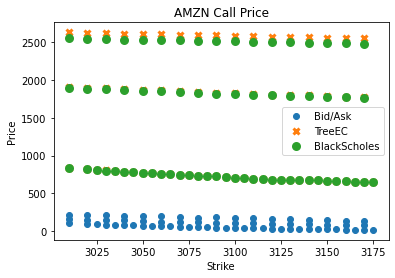

In [25]:
plt.scatter(AMZN_ATM_calls["Strike"],AMZN_ATM_calls["Last Price"],label="Bid/Ask")
plt.scatter(AMZN_ATM_calls["Strike"],AMZN_ATM_calls["Tree_Price"],label="TreeEC",marker="x",linewidth=3)
plt.scatter(AMZN_ATM_calls["Strike"],AMZN_ATM_calls["Black_Price"],label="BlackScholes",linewidth=3)

plt.legend()

plt.title("AMZN Call Price")
plt.xlabel("Strike")
plt.ylabel("Price")


AMZN Puts' plot

Text(0, 0.5, 'Price')

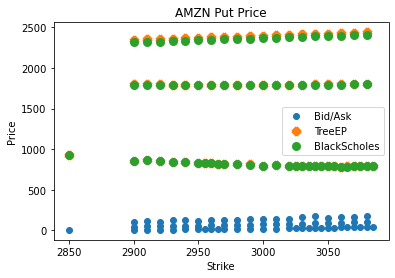

In [30]:
plt.scatter(AMZN_ATM_puts["Strike"],AMZN_ATM_puts["Last Price"],label="Bid/Ask")
plt.scatter(AMZN_ATM_puts["Strike"],AMZN_ATM_puts["Tree_Price"],label="TreeEP",marker="x",linewidth=6)
plt.scatter(AMZN_ATM_puts["Strike"],AMZN_ATM_puts["Black_Price"],label="BlackScholes",linewidth=3)

plt.legend()

plt.title("AMZN Put Price")
plt.xlabel("Strike")
plt.ylabel("Price")


- According to graph, we can say that Tree Prices and Blackscholes Prices our moving in a harmony.
- For Call Option, as Strike price increases  price of the option  decreases
- For Put Option, as Strike price increases price of the decreases

## Absolute Error Calculation

In [32]:
## Blackscholes function to calulate Put option price

# S= Stock Price

# K= Strike Price

# t= Expiration Date

# sig= Volatility

# optype= Type

# r= risk free interest rate



def blackscholes_P(S,K,t,sig,r=0.0008):
    
    d1= (np.log(S/K)+(r+sig**2/2)*t)/(sig*np.sqrt(t))
    
    d2= d1-sig*np.sqrt(t)
           
    put_price = K* np.exp(-r*t)* norm.cdf(-d2,0,1) -  S* norm.cdf(-d1,0,1)
        
    return put_price


In [33]:
# Binomial General Additive European Put

def sing_AdditiveEP(S,K,T,r,sig,N,):

    
    
    
    dt=T/(N-1)                                      # Dividing time into N periods
    
    nu=r- 0.5*(sig**2)                             # risk neutral drift
    
    dxu=np.sqrt((sig**2)*dt + (nu*dt)**2)         # Small increment in x
    
    dxd= -dxu
    
    pu= 0.5+ 0.5*((nu*dt)/dxu)                   # Prob up
    
    pd=1-pu                                     # Prob down
    
    disc=np.exp(-r*dt)                          # continuous discount
    
    
    
    #St=S* np.exp(N*dxd)
    
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N,N))
    
    put_prices=np.zeros((N,N))
    
    
    
    #stock_prices[0,0]=S
    
    for j in range(0,N):
        
        M=j+1
        
        
        stock_prices[j,0]= S* math.exp(j*dxd)
        
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(j*dxd)
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(dxu-dxd)
        
        for i in range(1,M):
            
            stock_prices[j,i]=stock_prices[j,i-1]*np.exp(dxu-dxd)
            
            
        
        
    
    
    put_prices[0,0]=0
    
    
    for j in range(1,N):
        
        M=j+1
        
        
        put_prices[j,0]=max(0,K-stock_prices[j,0])
        
        
        for i in range(1,M):
            
            
            put_prices[j,i]=max(0,stock_prices[j,i]-K)
        
        
         
    #return call_prices

    
    #return dxd
    #return stock_prices
    
    #return call_prices
    
    
    rput_prices=np.zeros((N,N))
    
    for j in range(N-1,-1,-1):
        
        if j==N-1:
            
            for i in range(0,N):
                
                rput_prices[j,i]=put_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j+1):
                
                rput_prices[j,i]=  disc* (pd*rput_prices[j+1,i]  +  pu*rput_prices[j+1,i+1])
                
                #print(rcall_prices[j,i])
    
    
    return rput_prices[0,0]
                


In [34]:
N=[10,20,30,40,50,100,150,200,250,300,350,400]

S=100

K=100

T=1
t=1
sig=0.2

r=0.0008

abs_error=[]

for i in N:
    
    tree=sing_AdditiveEP(S,K,T,r,sig,N=i)
    
    blackscholes= blackscholes_P(S,K,sig,r,t)
    
    abs_error.append(abs(tree-blackscholes))
    
#abs_error
    

df_error=pd.DataFrame({"N":N, "Error":abs_error})


    
df_error   
    



,N,Error
0,10,8.346581
1,20,8.109600
2,30,8.072393
3,40,8.054400
4,50,8.043768
5,100,8.022865
6,150,8.016002
7,200,8.012590
8,250,8.010549
9,300,8.009190


Plot of Error

Text(0, 0.5, 'Steps')

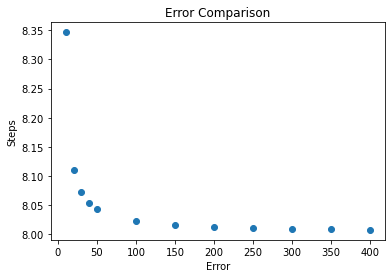

In [35]:
plt.scatter(df_error["N"],df_error["Error"] )

plt.title("Error Comparison")

plt.xlabel("Error")
plt.ylabel("Steps")

- According to computation  and graph it could be easily see that error value decreases dramatically as number of steps increases. After, some value, acceleration of the decrease gets small.

# Part2

### Standard European Call Option by Trinomial Tree

In [40]:
def TrinomialEC(S,K,T,sig,r,div,N):
    
    
    dt= T/N
    
    nu= r- div - (0.5 * sig**2)
    
    dx= sig * np.sqrt(3*dt)
    
    edx= np.exp(dx)
    
    pu= 0.5*((sig**2*dt + nu**2*dt**2)/ dx**2 + nu*dt/dx)
    
    pd= 0.5* (( sig**2*dt + nu**2*dt**2 -  nu*dt/dx ))
    
    pm= 1- (sig**2*dt + nu**2*dt**2)/ dx**2
    
    disc= np.exp(-r*dt)
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N+1,2*N+1))
    
    call_prices=np.zeros((N+1,2*N+1))
    
    
    stock_prices[0,0]=S
    
    for j in range(1,N+1):

        M=j*2+1


        stock_prices[j,0]= S* np.exp(-j*dx)
            
        #return stock_prices
            
        for i in range(1,M):

            stock_prices[j,i]=stock_prices[j,i-1]*edx
                
                
    #return stock_prices
    
    
    
    call_prices[0,0]=0    
    for j in range(1,N+1):
        
            M=j*2+1
        
        
            call_prices[j,0]=max(0,stock_prices[j,0]-K)
        
        
            for i in range(1,M):
            
            
                call_prices[j,i]=max(0,stock_prices[j,i]-K)
                
                
    #return call_prices
    
    rcall_prices=np.zeros((N+1,2*N+1))
    
    for j in range(N,-1,-1):
        
        if j==N:
            
            for i in range(0,2*N+1):
                
                rcall_prices[j,i]=call_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j*2+1):
                
                rcall_prices[j,i]=  disc* (pd*rcall_prices[j+1,i]  +pm*rcall_prices[j+1,i+1] + pu*rcall_prices[j+1,i+2] )
                
                #print(rcall_prices[j,i])
    
    
    return rcall_prices
                
    



European Call Option  Trinomial Tree with random parameters

In [42]:
TrinomialEC(S=100,K=100,T=1,sig=0.2,r=0.06,div=0.03,N=3)

array([[ 8.11808501,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.65249386,  6.41482125, 22.88697555,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.80084122, 22.90508353, 46.20300856,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 22.14027582,
        49.18246976, 82.21188004]])

## Up and Out Trinomial Tree

In [44]:
def TrinomialUO(S,K,T,sig,r,div,N,H):
    
    
    dt= T/N
    
    nu= r- div - (0.5 * sig**2)
    
    dx= sig * np.sqrt(3*dt)
    
    edx= np.exp(dx)
    
    pu= 0.5*((sig**2*dt + nu**2*dt**2)/ dx**2 + nu*dt/dx)
    
    pd= 0.5* (( sig**2*dt + nu**2*dt**2 -  nu*dt/dx ))
    
    pm= 1- (sig**2*dt + nu**2*dt**2)/ dx**2
    
    disc= np.exp(-r*dt)
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N+1,2*N+1))
    
    call_prices=np.zeros((N+1,2*N+1))
    
    
    stock_prices[0,0]=S
    
    for j in range(1,N+1):

        M=j*2+1


        stock_prices[j,0]= S* np.exp(-j*dx)
            
        #return stock_prices
            
        for i in range(1,M):

            stock_prices[j,i]=stock_prices[j,i-1]*edx
                
                
    #return stock_prices
    
    
    
    call_prices[0,0]=0    
    for j in range(1,N+1):
        
         
        
        
            M=j*2+1
        
            for i in range(0,M):
        
                if stock_prices[j,i]>H :
        
                    call_prices[j,i]=max(0,stock_prices[j,i]-K)
        
        
                
                
                else:
                
                    call_prices[j,i]=0
                
                #for i in range(1,M):
            
            
                    #call_prices[j,i]=0
                
                              
                
    #return call_prices


    
    rcall_prices=np.zeros((N+1,2*N+1))
    
    for j in range(N,-1,-1):
        
        if j==N:
            
            for i in range(0,2*N+1):
                
                rcall_prices[j,i]=call_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j*2+1):
                
                rcall_prices[j,i]=  disc* (pd*rcall_prices[j+1,i]  +pm*rcall_prices[j+1,i+1] + pu*rcall_prices[j+1,i+2] )
                
                #print(rcall_prices[j,i])
    
    
    return rcall_prices
                



Applying the Treenomial Up and Out, and we got 0.39499821 for option price

In [45]:
TrinomialUO(S=10,K=10,T=0.3,sig=0.2,r=0.01,div=0,N=3,H=11)

array([[0.39499821, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.03037583, 0.31402183, 1.14634091, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.18752603, 1.16769235, 2.26892477,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.15769734,
        2.449421  , 3.89068717]])

## Up-and-Out Call option explicit

### Blackscholes for Call Option

In [46]:
## Blackscholes function to calulate call option price

# S= Stock Price

# K= Strike Price

# t= Expiration Date

# sig= Volatility

# optype= Type

# r= risk free interest rate



def blackscholes_C(S,K,t,sig,r=0.0008):
    
    d1= (np.log(S/K)+(r+sig**2/2)*t)/(sig*np.sqrt(t))
    
    d2= d1-sig*np.sqrt(t)
        
    call_price=norm.cdf(d1,0,1)*S-  norm.cdf(d2,0,1)*K*np.exp(-r*t)
        
    return call_price

### Blackscholes for Put Option

In [47]:
## Blackscholes function to calulate Put option price

# S= Stock Price

# K= Strike Price

# t= Expiration Date

# sig= Volatility

# optype= Type

# r= risk free interest rate



def blackscholes_P(S,K,t,sig,r=0.0008):
    
    d1= (np.log(S/K)+(r+sig**2/2)*t)/(sig*np.sqrt(t))
    
    d2= d1-sig*np.sqrt(t)
           
    put_price = K* np.exp(-r*t)* norm.cdf(-d2,0,1) -  S* norm.cdf(-d1,0,1)
        
    return put_price


## Up-and-Out Call option explicit

In [48]:
# Parameters used in Formula: S,K,T,sig,H,r, 
# We also use standard normal cumulative distribution function in the formula




def UOexplicit(S,K,t,sig,r,div,H):
    
    BS_k=blackscholes_C(S,K,t,sig)
    BS_h=blackscholes_C(S,H,t,sig)
    
    BS_K= blackscholes_C((H**2/S),K,t,sig)
    
    BS_H= blackscholes_C((H**2/S),H,t,sig)
    
    
    v= r-div- (sig**2)/2
    dbs= (np.log(S/H) + v*t)/ (sig*np.sqrt(t))
    
    dbs_rev= (np.log(H/S) + v*t)/ (sig*np.sqrt(t))
    
    
    
    UObs= (BS_k-BS_h-(H-K)*np.exp(-r*t)*norm.cdf(dbs,0,1) -(H/S)**(2*v/sig**2))* ( BS_K - BS_H - (H-K)*np.exp(-r*t)*norm.cdf(dbs_rev,0,1))
    
    
    return UObs
    


In [49]:
UOexplicit(S=10,K=10,t=0.3,sig=0.2,r=0.0008,div=0,H=11)

-0.0722527723829439

- The result of call option using explicit formula with parameters S=10,K=10,t=0.3,sig=0.2,r=0.0008,div=0,H=11 is -0.0722527723829439

- The result of call option using Trinomial Tree with parameters S=10,K=10,t=0.3,sig=0.2,r=0.0008,div=0,H=11 is 0.39499821

- We can say that result are very close to each other




## European Up-and-In call option explicit

In [50]:
def UIexplicit(S,K,t,sig,r,div,H):
    
    
    BS_K= blackscholes_P((H**2/S),K,t,sig)
    
    BS_H= blackscholes_P((H**2/S),H,t,sig)
    
    BS_h=blackscholes_C(S,H,t,sig)
    
    
    v= r-div- (sig**2)/2
    dbs= (np.log(S/H) + v*t)/ (sig*np.sqrt(t))
    
    dbs_rev= - (np.log(H/S) + v*t)/ (sig*np.sqrt(t))
    
    
    BS_h_C=blackscholes_C(S,H,t,sig)
    
    
    
    
    
    
    
    UIbs=(H/S)**(2*v/sig**2)* ( BS_K -  BS_H + (H-K)*np.exp(-r*t) *norm.cdf(dbs_rev)) + BS_h_C + (H-K)*np.exp(-r*t)*norm.cdf(dbs,0,1)
    
    
    return UIbs
    

In [51]:
UIexplicit(S=10,K=10,t=0.3,sig=0.2,r=0.0008,div=0,H=11)

0.3853601597487307

# Part3

In [52]:
# Binomial General Additive American Put

def AdditiveAP(S,K,r,sig,T,N):
    
    
    
    dt=T/(N-1)                                      # Dividing time into N periods
    
    nu=r- 0.5*(sig**2)                             # risk neutral drift
    
    dxu=np.sqrt((sig**2)*dt + (nu*dt)**2)         # Small increment in x
    
    dxd= -dxu
    
    pu= 0.5+ 0.5*((nu*dt)/dxu)                   # Prob up
    
    pd=1-pu                                     # Prob down
    
    disc=np.exp(-r*dt)                          # continuous discount
    
    
    
    #St=S* np.exp(N*dxd)
    
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N,N))
    
    put_prices=np.zeros((N,N))
    
    
    
    #stock_prices[0,0]=S
    
    for j in range(0,N):
        
        M=j+1
        
        
        stock_prices[j,0]= S* np.exp(j*dxd)
        
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(j*dxd)
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(dxu-dxd)
        
        for i in range(1,M):
            
            stock_prices[j,i]=stock_prices[j,i-1]*np.exp(dxu-dxd)
            
            
        
        
    
    
    put_prices[0,0]=0
    
    
    for j in range(1,N):
        
        M=j+1
        
        
        put_prices[j,0]=max(0,K-stock_prices[j,0])
        
        
        for i in range(1,M):
            
            
            put_prices[j,i]=max(0,K-stock_prices[j,i])
        
        
         
    #return call_prices

    
    #return dxd
    #return stock_prices
    
    #return call_prices
    
    
    C_stock_prices=np.zeros((N,N))
    rput_prices=np.zeros((N,N))
       

    
    
    
    for j in range(N-1,-1,-1):
        
        if j==N-1:
            
            for i in range(0,N):
                
                rput_prices[j,i]=put_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j+1):
                
                rput_prices[j,i]=  disc* (pd*rput_prices[j+1,i]  +  pu*rput_prices[j+1,i+1])
                
                C_stock_prices[j,i]=stock_prices[j,i]/ (np.exp(dxd))
                
                
                rput_prices[j,i]= max(rput_prices[j,i], K- C_stock_prices[j,i])
                
                #print(rcall_prices[j,i])
    
    
    #return rput_prices

    #return stock_prices

    return rput_prices
    
    #return dxd

    #return dt
                


In [54]:
AdditiveAP(S=100,K=100,r=0.06,sig=0.2,T=1,N=4)

array([[ 5.79043758,  0.        ,  0.        ,  0.        ],
       [10.74452934,  2.06581214,  0.        ,  0.        ],
       [18.76869087,  4.76124036,  0.        ,  0.        ],
       [29.44036276, 10.9736066 ,  0.        ,  0.        ]])

## The Binomial Model for Assets Paying A Continuous Dividend Yield

In [55]:

def Condiv_AP(S,K,r,sig,T,div,N):
    
    
    
    dt=T/(N-1)                                      # Dividing time into N periods
    
    nu=r- div- 0.5*(sig**2)                             # risk neutral drift
    
    dxu=1.2         # Small increment in x
    
    dxd=0.9
    
    edxd= dxu/dxd
    
    pu= 0.5+ 0.5*((nu*dt)/dxu)                   # Prob up
    
    pd=1-pu                                     # Prob down
    
    disc=np.exp(-r*dt)                          # continuous discount
    
    
    
    #St=S* np.exp(N*dxd)
    
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N,N))
    
    put_prices=np.zeros((N,N))
    
    
    
    #stock_prices[0,0]=S
    
    for j in range(0,N):
        
        M=j+1
        
        
        stock_prices[j,0]= S*(dxd)**j
        
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(j*dxd)
        #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(dxu-dxd)
        
        for i in range(1,M):
            
            stock_prices[j,i]=stock_prices[j,i-1]*edxd
            
            
        
        
    
    
    put_prices[0,0]=0
    
    
    for j in range(1,N):
        
        M=j+1
        
        
        put_prices[j,0]=max(0,K-stock_prices[j,0])
        
        
        for i in range(1,M):
            
            
            put_prices[j,i]=max(0,K-stock_prices[j,i])
        
        
         
    #return call_prices

    
    #return dxd
    #return stock_prices
    
    #return call_prices
    
    
    C_stock_prices=np.zeros((N,N))
    rput_prices=np.zeros((N,N))
       

    
    for j in range(N-1,-1,-1):
        
        if j==N-1:
            
            for i in range(0,N):
                
                rput_prices[j,i]=put_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j+1):
                
                rput_prices[j,i]=  disc* (pd*rput_prices[j+1,i]  +  pu*rput_prices[j+1,i+1])
                
                C_stock_prices[j,i]=stock_prices[j,i]/ (np.exp(-r*T))
                
                
                rput_prices[j,i]= max(rput_prices[j,i], K- C_stock_prices[j,i])
                
                #print(rcall_prices[j,i])
    
    
    #return rput_prices

    #return stock_prices

    return rput_prices[0,0]
    
    #return dxd

    #return dt

Applying the function with random Strike Price value

In [56]:
Condiv_AP(S=40,K=40,r=0.04,sig=0.1,T=0.5,div=0.02,N=3)

1.850755807317387

Applying the function on various strike prices

In [57]:
result=[]

for i in range(0,100):
    
    value=Condiv_AP(S=40,K=i,r=0.04,sig=0.1,T=0.5,div=0.02,N=3)
    
    
    result.append(value)

result

df=pd.DataFrame(result,columns=["Option Price"])

df

    

,Option Price
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
95,54.191946
96,55.191946
97,56.191946
98,57.191946


## The Binomial Model With A Known Discrete Proportional Dividend

In [58]:

def Condivdis_AP(S,K,r,sig,T,tau,div,N):
    
    
    
    dt=T/(N-1)                                      # Dividing time into N periods
    
    nu=r- div- 0.5*(sig**2)                             # risk neutral drift
    
    dxu=np.sqrt((sig**2)*dt + (nu*dt)**2)         # Small increment in x
    
    dxd= -dxu

    
    
    pu= 0.5+ 0.5*((nu*dt)/dxu)                   # Prob up
    
    pd=1-pu                                     # Prob down
    
    disc=np.exp(-r*dt)                          # continuous discount
    
    
    
    #St=S* np.exp(N*dxd)
    
    
    
    
    # Creating stock and call matrices to hold values
    stock_prices=np.zeros((N,N))
    
    put_prices=np.zeros((N,N))
    

  
    tauh=T/N-1    
    
    
    
    #stock_prices[0,0]=S
    
    for j in range(0,N):
        
        M=j+1
        
        tauh*(2**(j-1))
        
        
        if tauh<tau:                
        
        
            stock_prices[j,0]= S* np.exp(j*dxd)
        
            #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(j*dxd)
            #stock_prices[j,0]= stock_prices[j-1,0]* np.exp(dxu-dxd)
        
            for i in range(1,M):
            
                stock_prices[j,i]=stock_prices[j,i-1]*np.exp(dxu-dxd)
                
                
                
        else:
            
            
            
            stock_prices[j,0]= S*(dxd)**j*(1-div)
            
            
            for i in range(1,M):
            
                stock_prices[j,i]=stock_prices[j,i-1]*np.exp(dxu-dxd)*(1-div)
                
                
            
            
            
        
        
    
    
    put_prices[0,0]=0
    
    
    for j in range(1,N):
        
        M=j+1
        
        
        put_prices[j,0]=max(0,K-stock_prices[j,0])
        
        
        for i in range(1,M):
            
            
            put_prices[j,i]=max(0,K-stock_prices[j,i])
        
        
         
    #return call_prices

    
    #return dxd
    #return stock_prices
    
    #return call_prices
    
    
    C_stock_prices=np.zeros((N,N))
    rput_prices=np.zeros((N,N))
       

    
    for j in range(N-1,-1,-1):
        
        if j==N-1:
            
            for i in range(0,N):
                
                rput_prices[j,i]=put_prices[j,i]
                
        else:
        
        
            
            for i in range(0,j+1):
                
                rput_prices[j,i]=  disc* (pd*rput_prices[j+1,i]  +  pu*rput_prices[j+1,i+1])
                
                C_stock_prices[j,i]=stock_prices[j,i]/ (np.exp(-r*T))
                
                
                rput_prices[j,i]= max(rput_prices[j,i], K- C_stock_prices[j,i])
                
                #print(rcall_prices[j,i])
    
    
    return rput_prices[0,0]


In [59]:
Condivdis_AP(S=100,K=100,r=0.06,sig=0.2,div=0.03,T=1,tau=0.6667,N=4)

6.896410143010434

Applying the function on various strike prices

In [61]:
result=[]

for i in range(0,100):
    
    value=Condivdis_AP(S=40,K=i,r=0.04,sig=0.1,T=1,tau=0.333,div=0.03,N=4)
    
    
    result.append(value)

df1=pd.DataFrame(result,columns=["Option Price"])

df1



,Option Price
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
95,53.367569
96,54.367569
97,55.367569
98,56.367569
